In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("metadata.csv")

# Basic info
print(df.shape)
print(df.info())
print(df.head())


C:\Users\USER\AppData\Local\Temp\ipykernel_18804\2187337517.py:6: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv")


(1056660, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null  

In [2]:
df.isnull().sum().sort_values(ascending=False).head(10)


mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
sha                  682894
pdf_json_files       682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
dtype: int64

In [3]:
df = df.dropna(subset=['publish_time', 'title'])


In [4]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')


In [5]:
print(df['publish_time'].head())


0   2001-07-04
1   2000-08-15
2   2000-08-25
3   2001-02-22
4   2001-05-11
Name: publish_time, dtype: datetime64[ns]


In [6]:
df['year'] = df['publish_time'].dt.year
print(df[['publish_time', 'year']].head())


  publish_time    year
0   2001-07-04  2001.0
1   2000-08-15  2000.0
2   2000-08-25  2000.0
3   2001-02-22  2001.0
4   2001-05-11  2001.0


C:\Users\USER\AppData\Local\Temp\ipykernel_18804\1369534484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


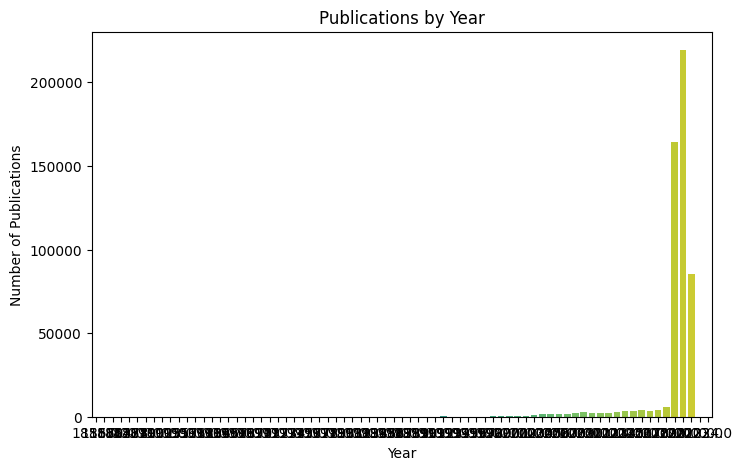

In [7]:
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_18804\696644619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_journals.index, x=top_journals.values, palette="mako")


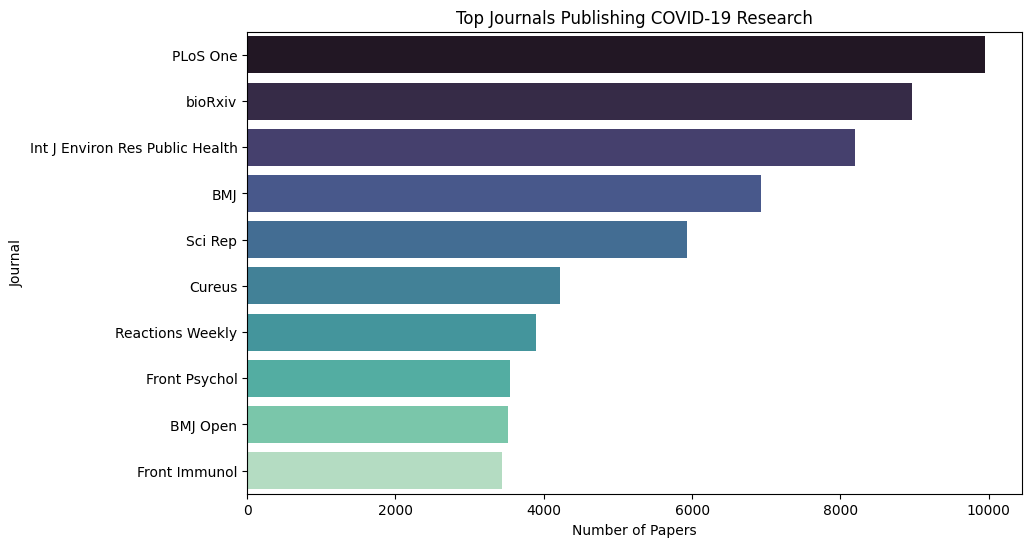

In [8]:
top_journals = df['journal'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_journals.index, x=top_journals.values, palette="mako")
plt.title("Top Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_18804\3714770126.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='word', x='count', data=wc_df, palette="plasma")


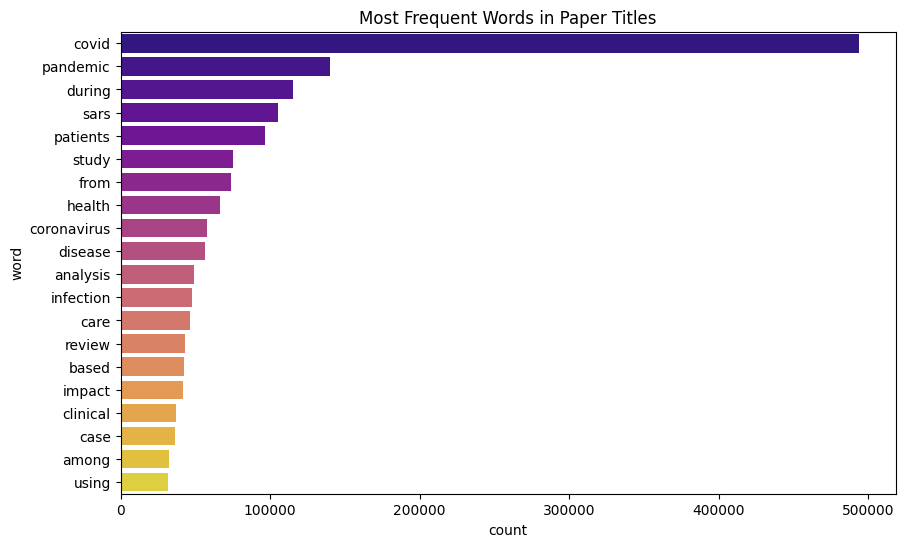

In [9]:
from collections import Counter
import re

# Drop NaN titles
titles = df['title'].dropna().astype(str)

# Tokenize words
words = []
for title in titles:
    words.extend(re.findall(r'\w+', title.lower()))

# Remove very common stopwords
stopwords = {"the", "and", "of", "in", "to", "for", "a", "on", "with", "an", "by"}
words = [w for w in words if w not in stopwords and len(w) > 3]

word_counts = Counter(words).most_common(20)

# Plot
wc_df = pd.DataFrame(word_counts, columns=['word', 'count'])
plt.figure(figsize=(10,6))
sns.barplot(y='word', x='count', data=wc_df, palette="plasma")
plt.title("Most Frequent Words in Paper Titles")
plt.show()
